Top 50 most subscribed channels on Youtube review

In [67]:
# libraries import for data manipulation
import pandas as pd
import numpy as np
# libraries import for data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import HTML

In [68]:
# data import
df = pd.read_csv('/Users/stephaniel/Documents/personnal_project_1/Most Subscribed YouTube Channels_exported.csv')
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States


data used in this dataframe: 
- Name : Name of the channel
- Brand channel : If yes is shown, this channel is tied to a company. If no is shown, it is a personnal channel, meaning not tied to a company.
- Subscribers (in millions): Total amount of subscribers, exprimed in millions
- Primary language : default language of the channel
- Category : Channel's category (music, entertainement, gaming and such)
- Country : Channel's country of origin (or creator's channel origin)

In [69]:
# data cleaning
df["Primary language"] = df["Primary language"].str.strip('[]0123456789')
df['Country'].iloc[13] = df['Country'].iloc[13].strip("[a]")

#replacing nonbreakspace with regular space 
nonBreakSpace = u'\xa0'
df = df.replace(nonBreakSpace,' ',regex=True)
df['Country'] = df['Country'].str.replace(r"[A-Za-z]+-\sUnited States", r"United States", regex=True)
df['Country'] = df['Country'].str.replace(r"Cyprus\[[A-Za-z0-9]+\]", r"Cyprus", regex=True)
df['Country'] = df['Country'].str.replace(r"United States\s+\(\s+[A-Za-z]+\s+[A-Za-z]+\)", r"Puerto Rico", regex=True)


/var/folders/2z/22mpdqgj5fdd961v6vtrpb7h0000gn/T/ipykernel_18837/698685079.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



View of countries having the most subscribers

In [70]:
#replacing nonbreakspace with normal space
nonBreakSpace = u'\xa0'
df['Country'] = df['Country'].replace(nonBreakSpace,' ',regex=True)
df['Country'] = df['Country'].str.replace(r"[A-Za-z]+-\sUnited States", r"United States", regex=True)
df['Country'] = df['Country'].str.replace(r"Cyprus\[[A-Za-z0-9]+\]", r"Cyprus", regex=True)
df['Country'] = df['Country'].str.replace(r"United States\s+\(\s+[A-Za-z]+\s+[A-Za-z]+\)", r"Puerto Rico", regex=True)

In [71]:
#preparing data for plotting
sub_country = df[['Country', 'Subscribers (millions)']]
sub_country = sub_country.groupby('Country').sum()
sub_country = sub_country.reset_index()
sub_country

,Country,Subscribers (millions)
0,Argentina,59.7
1,Belarus,47.2
2,Brazil,66.6
3,Canada,71.9
4,Chile,48.6
5,Cyprus,80.2
6,El Salvador,46.3
7,India,1464.0
8,Mexico,47.0
9,Pakistan,46.3


In [72]:

#.sum() all subscribers for future plotting
sub_country = sub_country.groupby("Country").sum()
sub_country = sub_country.sort_values(by='Subscribers (millions)', ascending=False)
sub_country

,Subscribers (millions)
Country,
India,1464.0
United States,1209.0
South Korea,309.7
Sweden,111.0
Cyprus,80.2
Canada,71.9
Brazil,66.6
Argentina,59.7
Romania,54.7


array([<AxesSubplot:ylabel='Subscribers (millions)'>], dtype=object)

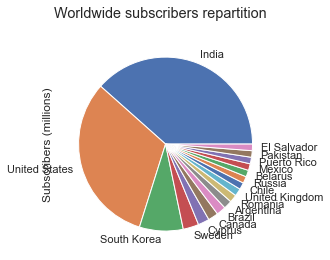

In [80]:
sns.set_theme()
sub_country.plot.pie(subplots=True,legend=False,title = "Worldwide subscribers repartition")

In [ ]:
#adding iso_codes to our data frame
sub_country = sub_country.reset_index()
iso_codes = pd.read_html('https://www.iban.com/country-codes')
iso_codes=iso_codes[0]
iso_codes = iso_codes[['Country', 'Alpha-3 code']]
sub_country_joined = pd.merge(sub_country, iso_codes, on='Country', how= "left")
sub_country_joined

,Country,Subscribers (millions),Alpha-3 code
0,India,1464.0,IND
1,United States,1209.0,NaN
2,South Korea,309.7,NaN
3,Sweden,111.0,SWE
4,Cyprus,80.2,CYP
5,Canada,71.9,CAN
6,Brazil,66.6,BRA
7,Argentina,59.7,ARG
8,Romania,54.7,ROU
9,United Kingdom,53.7,NaN


In [ ]:
#replacing non matching values
replacing_values = {"Russian Federation (the)" : "Russia", "United States of America (the)" : "United States", "Korea (the Republic of)" : "South Korea", 
                    "United Kingdom of Great Britain and Northern Ireland (the)" : "United Kingdom"}
iso_codes = iso_codes.replace({"Country": replacing_values})
sub_country_merged = pd.merge(sub_country, iso_codes, on="Country", how="left")
sub_country_merged

# plotting our data with a map chart
world_sub_plot = px.choropleth(sub_country_merged, locations='Alpha-3 code', color='Subscribers (millions)')
world_sub_plot.update_layout(title={
    'text' : "Countries with the most subscribers",
    'y' :0.9,
    'x' :0.45,
    'xanchor' : "center",
    'yanchor' : 'top'
})

Top 5 of branded and non branded channels

In [ ]:
# isolating relevant data
top5 = df[['Name', 'Brand channel', "Subscribers (millions)"]]
brand_channel = top5[top5['Brand channel'] == "Yes"]
nonbrand_channel = top5[top5['Brand channel'] == "No"]

In [ ]:
def horizontal(dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [ ]:
horizontal([brand_channel.head(),nonbrand_channel.head()])

,Name,Brand channel,Subscribers (millions)
0,T-Series,Yes,249.0
2,Cocomelon,Yes,165.0
3,Sony Entertainment Television India,Yes,162.0
4,Kids Diana Show,Yes,113.0
8,Zee Music Company,Yes,99.5
,Name,Brand channel,Subscribers (millions)
1,MrBeast,No,184.0
5,PewDiePie,No,111.0
6,Like Nastya,No,107.0
7,Vlad and Niki,No,101.0


View of most spoken languages 

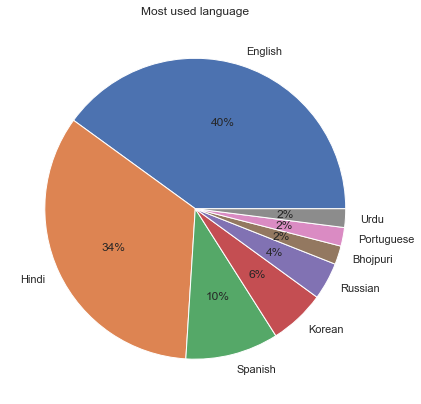

In [ ]:
languages = pd.DataFrame(df['Primary language'])
languages['nb'] = 1
languages = languages.groupby("Primary language").sum().sort_values(by="nb", ascending=False)

plot_lang = languages.reset_index()
sns.set_theme()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(plot_lang['nb'], labels=plot_lang['Primary language'],autopct='%1.0f%%')
ax.set_title('Most used language')
plt.tight_layout()

View of most represented channel category

In [ ]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi,Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi,Entertainment,India
4,Kids Diana Show,Yes,113.0,English,Entertainment,United States


In [ ]:
categories = pd.DataFrame(df['Category'])
categories['count'] = 1
categories = categories.groupby('Category').sum()
categories = categories.sort_values(by="count",ascending=True)


In [ ]:
categories

,count
Category,
Games,1
How-to,1
News,1
Film,2
Sports,2
Education,4
Entertainment,17
Music,22


<function matplotlib.pyplot.axis(*args, emit=True, **kwargs)>

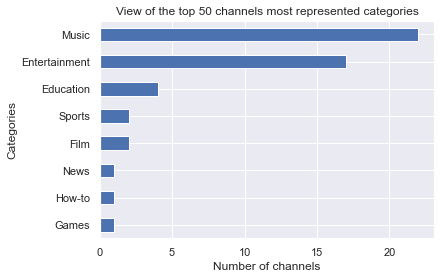

In [ ]:
sns.set_theme()
fig_cat = categories.plot(kind='barh', stacked=True, legend=False)
fig_cat.set_title('View of the top 50 channels most represented categories')
fig_cat.set_xlabel('Number of channels')
fig_cat.set_ylabel('Categories')
plt.axis

Brand / non brand channel proportion

In [ ]:
brand = pd.DataFrame(df['Brand channel'])
brand['count'] = 1
brand = brand.groupby('Brand channel').sum()
brand

,count
Brand channel,
No,18
Yes,32


(-1.25, 1.25, -1.25, 1.25)

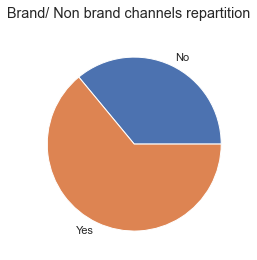

In [ ]:
brand_plot = brand.plot(kind="pie", subplots=True, legend=False, title="Brand/ Non brand channels repartition")
plt.axis('off')

In [86]:
df.head(3)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi,Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States


In [90]:
#numbers of subscribers for non brand and brand channels
sub_brand = df.drop(['Primary language','Category','Country'], axis=1)
brand_sub = sub_brand[sub_brand['Brand channel'] == "Yes"]
nbrand_sub = sub_brand[sub_brand['Brand channel'] == "No"]


<AxesSubplot:title={'center':'Comparison between total subscribers for non brand and brand channels'}, xlabel='Brand channel'>

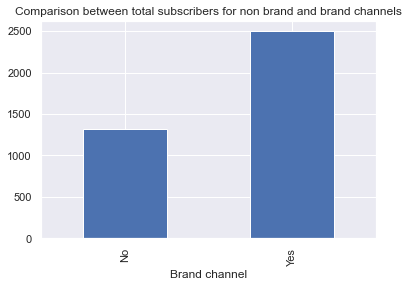

In [96]:
brand_sub_plot = sub_brand.groupby(by="Brand channel").sum()
brand_sub_plot.plot(kind="bar", title="Comparison between total subscribers for non brand and brand channels", legend=False)